# Programming for Data Analysis 

## Project - Declan Reidy

## Problem Statement

For this project it is required to create a data set by simulating a real-world phenomenon. This will require the synthesis of data based on research and asssumptions.

## Choose a real world phenomenon
A particular phenomenon that has begun to interest me more in the past number of years is the non-outcome based performance of professional sports teams. This is to say, the measurement of performance parameters not directly related to an outcome. In the case of soccer, a typical outcome might be "Trophies won", or at a more granular level "Points accumulated",  or even "Goals Scored" and "Goals Conceded". 

In the past 25 the media coverage of soccer has increased beyond all recognition with the UEFA Champions League and English Premier League in particular negotiating lucrative TV & Media distribution contracts. Given these enormous financial investments made in professional sports in the modern era there is certainly a market for generating further insights into the game to better train and prepare players, underpin more insightful media discussion and even inform betting markets. This led Opta, an international sports analytics company, to develop non-outcome based performance factors or advanced metrics such as "Expected Goals", "Expected Assists", "Sequences and possessions" and "Defensive coverage" in an attempt to generate insights beyond simple obvious statistics more traditionally consumed by the soccer viewing public.

In short, measuring non-outcome based performance aims to build metrics that could ultimately identify the best performer irrespective of whether that performer won a given competition. This becomes especially relevant for a game like soccer where at a professional level goals can be few and far between. The total number of scoring plays in a game is often as low as 0, while rarely being higher than 6. This information could better analyse who should have scored more goals in any given game and thus provide a better indicator as to what team performances may have deserved rather than what they may have achieved in previous games.

This project will aim to further identify the variables associated with the outcome of goalscoring in soccer and synthesise a set of data that reflects the distributions of these variables. 

### What is Expected Goals XG?
According to Opta, an international sports analytics company, Expected Goals (XG) measures the quality of a shot based on several variables such as assist type, shot angle, and distance from the goal, whether it was a headed shot and whether it was defined as a big chance.

Expected goals has gained much media attention in the past number of years as an alternative predictor to the performance of teams in a soccer game, irrespective of the result. As an example in simple terms, Team A might gain a victory over Team B by 1 goal to nil, a common scoreline in soccer. The only metric that counts here is goals. Team A might have been the better team but they also not have been. We need further statistical properties to help us decide. Tradionally these statistical properties might have been limited to "Time of possession" of the football, or "shots on target" at the opposition goal. 


### Why is XG useful?
The benefit of these statistics is that they can be informative at face value: for instance a team with a 70% share of possession might appear dominant, but this takes no account of how comfortable the opposition might be with this scenario. There may be no danger of conceding a goal during these long periods of possession. Goals are all that count. Similarly, achieving numerous shots on target may seem advantageous, but potentially this is not the case if these attempts on goal are from large distance or poor angles reducing the likelihood of a goal being conceded by the opposition. They may be very comfortable with this scenario too. Both of the above points serve to illustrate that these statistical metrics cannot give a clear insight into the events that unfolded. We must find a way to measure the quality and influence of these statistics.

Expected goals aims to qualify attempts on goal (based on several variables) and add them up to then calculate how many goals a team should have scored throughout a game. This is a bid to measure the quality of the performance of a given participant. The result should be to see who was the better team. Beyond the implications of a single game, XG can used to measure trends such as Top Performer for a season in a given category. In this case the logical argument is find a player or team who conistently outperforms their XG.

## Investigative steps

In order to develop our understanding of the XG phenomenon it's impertative to attempt to understand the variables which govern an XG model. From the reading it is clear that there are a number of variables that feed into the official XG calculation developed by OptaPro.

### Investigating possible variables
Acccording to OptaPro, Opta’s xG model is calculated using a logistic regression where the dependent variable is whether or not the shot was a goal and the regression inputs are as follows:
- Passage of play (open play, direct free kick, set play, corner kick, assisted, throw-in)
- Assist type (long ball, cross, through ball, danger-zone pass, pull-back)
- Post-Take–on
- Rebound
- Header
- Distance to goal
- Visible angle of the goal
- 1 v 1 (the shooter versus the goalkeeper with 3rd party influencers)
- Big chance
- Competition adjustments for a subset of competitions 

This is quite an extensive range of variables and it will be necessary to determine which among them are the most important as it would be impractical to deal with them all for the purposes of this project.

### Investigative development

We now need to identify which variables are the most important in determining XG. There appears to be some consensus that among the variables listed the most important are "Distance to goal" and "Visible angle of the goal", with the next most important being "Header" and "Big Chance"

#### Distance to goal

It is unsurprising to us to learn that shots on goal have a much greater likelihood of being successful the closer the are to the goal. We don't necessarily need data to support this but it stands to reason that this is true. That it would be so important for the XG calculation is therefore logical.

#### Visible angle to goal

Similar to the distance to goal, the angle has a strong impact on the likelihood of a goal being scored. It is safe to assume the narrow or more acute the angle the less likely it is that the outcome of the shot will be a goal.

#### Header

Depending on whether the shot is taken with the head or with the foot there will be significant difference in the XG. We would naturally expect the XG to be higher for a shot taken with a foot versus the head given the power transfer potential of the foot compared with the head.

#### Big chance

The final important variable is the big chance which is classified by Opta as a situation where the attacking player would reasonably be expected to score. Penalties for instance would be called a Big chance, while other scenarios where the shooter is very close to goal or the ball has an unobstructed path to goal would similarly qualify as big chances.

### Simplifying the calculation method

A more simple method of calculating XG could involve:

1. Distance to goal - Some research would indicate a potential shooter is more likely to shoot the closer they are to goal.

2. Shots - Some research would indicate there are between 20 and 40 shots in a game. (between 10 and 20 per team)

3. Shots on target - Some research would indicate there are between 10 and 15 shots on target in a game. (between 3 and 8 per team)

4. Goals per game - Looking to existing data we'll make the assumption that there is an average of 2.5 goals per game in a top level game.

5. Penalties - Some research would indicate that typically 80% of penalties are scored.

6. Big Chance (adjusted to exclude penalties)- Some research would indicate that typically 40% of big chances not including penalties are converted to goals.

7. Remaining shots inside the box - Some research would indicate that typically 7% of shots inside the box not classified as penalties or big chances are scored. 

8. Remaining shots outside the box - Some research would indicate that typically 4% of shots outside the box are scored. 


### Investigative distribution

Given the erratic nature of football results and relatively large standard deviation in number of goals scored in a game we can rule out the normal distribution as good model for our task. Lets first look at Shots and Shots on target to find any relationship. 

Research would indicate:

1. That there is a linear relationship between Shots and Shots on target 
2. There is a large difference in the quality of different teams in League of 20 teams
3. The standard of the 20 teams is normally distributed
4. Approx 33% of the shots taken result in shots on target

#### Distance to Goal

##### Exponential Distribution

Some research would indicate that goals scored will reduce in probability as distance increases. We can assume that the same would be true of distancet to goal and the propensity to shoot. Several sources would indicate that this would follow an exponential distribution. This is modelled simply below using the numpy.random package.

(array([  7.54227362e-02,   7.95479542e-02,   5.74207431e-02,
          4.01292042e-02,   2.68024582e-02,   1.94229015e-02,
          1.32006977e-02,   9.61404978e-03,   7.24204942e-03,
          4.49190407e-03,   3.20850291e-03,   2.14282158e-03,
          1.54695676e-03,   1.18027071e-03,   6.76077398e-04,
          4.12521802e-04,   3.89603924e-04,   3.78144985e-04,
          2.29178779e-04,   6.87536337e-05,   6.87536337e-05,
          5.72946948e-05,   0.00000000e+00,   5.72946948e-05,
          1.14589390e-05,   0.00000000e+00,   2.29178779e-05,
          1.14589390e-05,   0.00000000e+00,   1.14589390e-05]),
 array([  1.56860216e-02,   2.92462318e+00,   5.83356034e+00,
          8.74249750e+00,   1.16514347e+01,   1.45603718e+01,
          1.74693090e+01,   2.03782461e+01,   2.32871833e+01,
          2.61961205e+01,   2.91050576e+01,   3.20139948e+01,
          3.49229319e+01,   3.78318691e+01,   4.07408063e+01,
          4.36497434e+01,   4.65586806e+01,   4.94676177e+01,
      

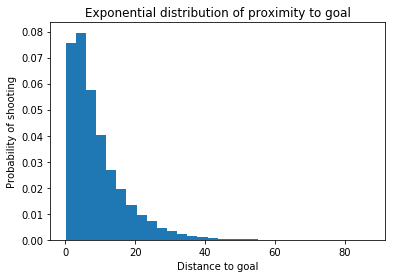

In [14]:
"Plotting the exponential relationship between distance to goal and shots"

import numpy.random as np
from scipy.stats import expon as exp
import matplotlib.pyplot as plt

%matplotlib inline

plt.xlabel("Distance to goal")
plt.ylabel("Probability of shooting")
plt.title("Exponential distribution of proximity to goal")
x = np.exponential(8,30000)
z = exp.rvs(x)
plt.hist(z, bins=30, density=True)


In [15]:
"Plotting the linear relationship between shots and shots on target"
"Using a standard deviation of 3 we can generate a random array of number of shots based on a random number between 12 and 25"

import pandas as pd
import numpy.random as np
import matplotlib.pyplot as plt

%matplotlib inline

z = np.randint(18,25)
x = np.normal(z,3,size=100)
x

array([ 21.80284146,  15.77151166,  17.84415616,  13.75109598,
        20.96748218,  19.86498568,  18.18657602,  17.1723623 ,
        18.9392759 ,  21.02012282,  21.9538126 ,  15.8465662 ,
        19.39812644,  18.03491894,  14.56329183,  25.15901996,
        11.42675982,  18.40604313,  19.8560497 ,  18.16241584,
        15.73088722,  18.38451792,  10.35254886,  17.49713876,
        15.87036471,  18.93158975,  17.46126734,  13.6761436 ,
        15.18307799,  20.55641727,  16.48403338,  16.95423786,
        19.43846942,  17.88513002,  22.47756706,  22.88955797,
        16.53622823,  18.77152185,  20.39118703,  19.09260628,
        10.27834779,  16.30082863,  21.19401763,  17.20657378,
        16.95741212,  18.89851953,  21.36787774,  23.64421215,
        17.6738116 ,  14.89788908,  16.74446183,  15.20234609,
        24.80874149,  13.6786398 ,  15.52000101,  15.92021899,
        13.78464202,  15.16366107,  17.96521533,  14.97737568,
        22.13596688,  15.29442661,  15.16158887,  19.45

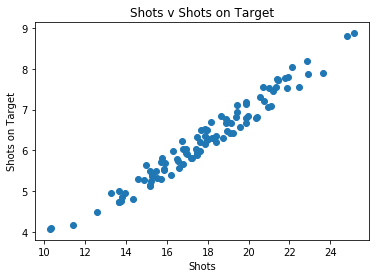

In [16]:
"Using the Random shots value we can then use the equation of a line to plot the shots on target (approx 33%)"
"We can also add some standard errors to the calculation by adding a small random sample to the x coordinate"

y = (x + 2*np.random((1,100)))/3

plt.xlabel("Shots")
plt.ylabel("Shots on Target")
plt.title("Shots v Shots on Target")

plt.scatter(x,y)

We have correctly synthesised Shots v Shots on Target. We can see a clear distribution of teams clustering around the mean. We can see some poorer performers and some stand out performers. Now we can introduce goals.

We can start by returning our shots quantity synthesised from the previous example. 

In [9]:
import numpy.random as np
import matplotlib.pyplot as plt

y

array([[  6.44118291,   8.63733805,   8.14504648,  10.02956975,
          8.3653359 ,   6.84278744,   6.39670577,   9.07583825,
          8.17118148,   5.93542857,   8.8714998 ,   9.04430956,
          7.21476727,   7.91273853,   6.90675217,   6.69190653,
          8.72257168,   7.93223245,   8.92782208,   6.74152236,
          7.05909407,   6.87442311,   7.91799377,   7.5428674 ,
          6.8453527 ,   6.44940497,   7.17742811,   9.42542899,
          7.25400289,   8.53995631,   9.13350573,   6.79447437,
          9.30678655,   7.9713893 ,   8.15174745,   8.53190895,
          8.62595366,   6.61153205,   7.46408115,   6.77698746,
          7.78547276,   7.511449  ,   6.79617978,   7.95740436,
          6.42950359,   6.64641489,   8.1854602 ,   7.48314651,
          6.40159119,   8.22625044,   6.90533255,   7.02095577,
          8.01419927,   8.95153874,   6.92059157,   7.54510155,
          7.43379543,   9.27380996,   7.32055192,   5.82483864,
          7.46935194,   7.90904769,   9.

We'll plot this on our x axis and create our goals scored using the equation for a line and the estimate that one in three chances is converted to a goal.

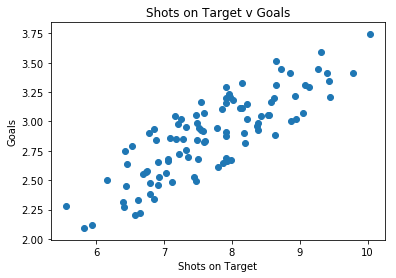

In [10]:
x = y
y1 = (x + 2*np.random((1,100)))/3

plt.xlabel("Shots on Target")
plt.ylabel("Goals")
plt.title("Shots on Target v Goals")

plt.scatter(x,y1)


We have correctly synthesised Shots on Target v Goals. We can see a clear distribution of teams clustering around the mean. We can see some poorer performers and some stand out performers as we would expect to see. Now we can evaluate how well we 

#### Goals per game

##### Poisson Distribution
Now that we have sythesised goals scored lets check our results against a standard poisson distribution for goals per game. First we can use the mean of the previous distribution of goals scored. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

gpg = np.mean(y/3)
gpg

2.5668518634144841

Using the mean result we can synthesise the probabilities of goals scored using the poisson distribution.

In [12]:
import numpy.random as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

gpg1 = np.poisson(gpg,20000)
gpg1



array([3, 2, 4, ..., 1, 1, 3])

In [ ]:
plt.xlabel("Goals scored per game")
plt.ylabel("Probability")
plt.title("Poisson distribution of goals per game")
plt.hist(gpg1,density=True)

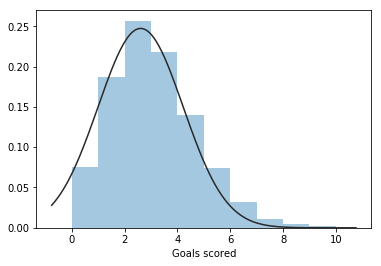

In [13]:
import numpy.random as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

gpg2 = np.poisson(gpg,10000)
sns.distplot(gpg2,bins=10,hist=True,kde=False,fit=norm,axlabel="Goals scored")

